# Proyecto Final: Integración de 3 o más cuerpos

- Carlos Daniel López Mimenza (**@SirSilverCharles**)
- Daniel Martínez Urrieta (**@danmarurr**)
- María Fernanda Pérez Ramírez (**@FernandaPerez**)

Para el problema de $N$ cuerpos, consideremos las ecuaciones de movimiento para cada una ellas (con la posición $\vec{q}_i$, masa $m_i$), suponiendo que las partículas se encuentran en el mismo plano (2D):

\begin{align}
    m_i \frac{{\rm d}^2\vec{q}_i}{{\rm d}t^2} = \sum_{i \neq j} \frac{Gm_im_j}{||\vec{q}_i - \vec{q}_j||^3}(\vec{q}_i - \vec{q}_j)
\end{align}

## Caso más simple: Tres cuerpos.

Para éste caso, tendremos que las ecuaciones que describen las trayectorias de las partículas son:

\begin{align}
    \ddot{\mathbf{x}}_1 &= - \frac{Gm_2}{(x_1 - x_2)^3}(\mathbf{x}_1 - \mathbf{x}_2) - \frac{Gm_3}{(x_1 - x_3)^3}(\mathbf{x}_1 - \mathbf{x}_3)\\
    \ddot{\mathbf{x}}_2 &= - \frac{Gm_3}{(x_2 - x_3)^3}(\mathbf{x}_2 - \mathbf{x}_3) - \frac{Gm_1}{(x_2 - x_1)^3}(\mathbf{x}_2 - \mathbf{x}_1)\\
    \ddot{\mathbf{x}}_3 &= - \frac{Gm_1}{(x_3 - x_1)^3}(\mathbf{x}_3 - \mathbf{x}_1) - \frac{Gm_2}{(x_3 - x_2)^3}(\mathbf{x}_3 - \mathbf{x}_2)
\end{align}

Para tomar sólo ecuaciones de primer orden (y así usar Taylor) implementamos además que:
\begin{align}
    \dot{\mathbf{v}}_j = \ddot{\mathbf{x}}_j \ \ \Rightarrow \dot{\mathbf{x}}_j = \mathbf{v}_j
\end{align}

In [1]:
using TaylorSeries
using PyPlot

In [2]:
x = Taylor1([1])

 1 + 𝒪(t¹)

In [3]:
x.order

0

In [4]:
eps(1.)

2.220446049250313e-16

In [5]:
#Agrego Línea para instalar modulo de Taylor (cortesia de Luis)
#Pkg.add("TaylorSeries")

In [6]:
const epsilon = 1.0e-20

function paso_int{T<:Real}(x_0::Taylor1{T})
    orden = x_0.order
    h1 = (epsilon/abs(x_0.coeffs[orden + 1]))^(1/orden) 
    h2 = (epsilon/abs(x_0.coeffs[orden]))^(1/(orden - 1))
    min(h1, h2)
end

function Horner{T<:Real, S<:Real}(x_0::Taylor1{S}, h::T)
    n = x_0.order
    suma = zeros(n)
    suma[1] = x_0.coeffs[n]
    for j in 2:n
        suma[j] = x_0.coeffs[n + 1 - j] + h*suma[j - 1]
    end
    suma[n]
end

functin

LoadError: LoadError: UndefVarError: functin not defined
while loading In[6], in expression starting on line 20

In [7]:
function Integrador_1(pos_iniciales, vel_ini, masas::Array{Float64,1}, t0::Float64, tf::Float64, p::Int)
    #Para ahorrar al momento de escribir los nombres se indicarán así: pi donde i es el número de cuerpo,
    # y p inidica si es posición o velocidad
    #Creamos los arreglos con los tiempos y las soluciones
    const G = 1
    v1 = typeof(vel_ini[1])[vel_ini[1]]
    v2 = typeof(vel_ini[2])[vel_ini[2]]
    v3 = typeof(vel_ini[3])[vel_ini[3]]
    p1 = typeof(pos_iniciales[1])[pos_iniciales[1]]
    p2 = typeof(pos_iniciales[2])[pos_iniciales[2]]
    p3 = typeof(pos_iniciales[3])[pos_iniciales[3]]
    ts = Float64[t0] #arreglo inicial para los tiempos
    
    m1 = masas[1]
    m2 = masas[2]
    m3 = masas[3]
    
    t = t0
    h = 1
    
    while t <= tf && h > 1e-8
        #Creo arreglos de cada parámetro
        arr_x1 = Float64[p1[end][1]]
        arr_x2 = Float64[p2[end][1]]
        arr_x3 = Float64[p3[end][1]]
        arr_y1 = Float64[p1[end][2]]
        arr_y2 = Float64[p2[end][2]]
        arr_y3 = Float64[p3[end][2]]
        
        arr_vx1 = Float64[v1[end][1]]
        arr_vx2 = Float64[v2[end][1]]
        arr_vx3 = Float64[v3[end][1]]
        arr_vy1 = Float64[v1[end][2]]
        arr_vy2 = Float64[v2[end][2]]
        arr_vy3 = Float64[v3[end][2]]
        
        #Creo Taylor's para cada parámetro
        for j in 1:p
            Taylor_arr_x1 = Taylor1(arr_x1)
            Taylor_arr_x2 = Taylor1(arr_x2)
            Taylor_arr_x3 = Taylor1(arr_x3)
            Taylor_arr_y1 = Taylor1(arr_y1)
            Taylor_arr_y2 = Taylor1(arr_y2)
            Taylor_arr_y3 = Taylor1(arr_y3)
            Taylor_arr_vx1 = Taylor1(arr_vx1)
            Taylor_arr_vx2 = Taylor1(arr_vx2)
            Taylor_arr_vx3 = Taylor1(arr_vx3)
            Taylor_arr_vy1 = Taylor1(arr_vy1)
            Taylor_arr_vy2 = Taylor1(arr_vy2)
            Taylor_arr_vy3 = Taylor1(arr_vy3)
            
            
            #@show Taylor_arr_x1          
            ##Definimos la operación de las 6 ecs de movimiento.
            
            
            r12 = ((Taylor_arr_x1 - Taylor_arr_x2)^2 + (Taylor_arr_y1 - Taylor_arr_y2)^2)^(1/2)
            r13 = ((Taylor_arr_x1 - Taylor_arr_x3)^2 + (Taylor_arr_y1 - Taylor_arr_y3)^2)^(1/2)
            r23 = ((Taylor_arr_x2 - Taylor_arr_x3)^2 + (Taylor_arr_y2 - Taylor_arr_y3)^2)^(1/2)
            
            #@show r12, r3, r23       
            
            #Para el cuerpo 1
            fx1 = -G*(m2*(Taylor_arr_x1 - Taylor_arr_x2)/(r12)^3 + m3*(Taylor_arr_x1 - Taylor_arr_x3)/(r13)^3)
            fy1 = -G*(m2*(Taylor_arr_y1 - Taylor_arr_y2)/(r12)^3 + m3*(Taylor_arr_y1 - Taylor_arr_y3)/(r13)^3)
            #Para el cuerpo 2
            fx2 = -G*(m3*(Taylor_arr_x2 - Taylor_arr_x3)/(r23)^3 + m1*(Taylor_arr_x2 - Taylor_arr_x1)/(r12)^3)
            fy2 = -G*(m3*(Taylor_arr_y2 - Taylor_arr_y3)/(r23)^3 + m1*(Taylor_arr_y2 - Taylor_arr_y1)/(r12)^3)
            #Para el cuerpo 3
            fx3 = -G*(m1*(Taylor_arr_x3 - Taylor_arr_x1)/(r13)^3 + m2*(Taylor_arr_x3 - Taylor_arr_x2)/(r23)^3)
            fy3 = -G*(m1*(Taylor_arr_y3 - Taylor_arr_y1)/(r13)^3 + m2*(Taylor_arr_y3 - Taylor_arr_y2)/(r23)^3)
            
            
            #Incluimos los nuevos coeficientes
            arr_x1 = push!(arr_x1, Taylor_arr_vx1.coeffs[j]/j)
            arr_x2 = push!(arr_x2, Taylor_arr_vx2.coeffs[j]/j)
            arr_x3 = push!(arr_x3, Taylor_arr_vx3.coeffs[j]/j)
            arr_y1 = push!(arr_y1, Taylor_arr_vy1.coeffs[j]/j)
            arr_y2 = push!(arr_y2, Taylor_arr_vy2.coeffs[j]/j)
            arr_y3 = push!(arr_y3, Taylor_arr_vy3.coeffs[j]/j)
            arr_vx1 =push!(arr_vx1, fx1.coeffs[j]/j)
            arr_vx2 =push!(arr_vx2, fx2.coeffs[j]/j)
            arr_vx3 =push!(arr_vx3, fx3.coeffs[j]/j)
            arr_vy1 =push!(arr_vy1, fy1.coeffs[j]/j)
            arr_vy2 =push!(arr_vy2, fy2.coeffs[j]/j)
            arr_vy3 =push!(arr_vy3, fy3.coeffs[j]/j)
        end
        #Hacemos Taylor de todos los arreglos finales
        Taylor_arr_x1 = Taylor1(arr_x1)
        Taylor_arr_x2 = Taylor1(arr_x2)
        Taylor_arr_x3 = Taylor1(arr_x3)
        Taylor_arr_y1 = Taylor1(arr_y1)
        Taylor_arr_y2 = Taylor1(arr_y2)
        Taylor_arr_y3 = Taylor1(arr_y3)
        Taylor_arr_vx1 = Taylor1(arr_vx1)
        Taylor_arr_vx2 = Taylor1(arr_vx2)
        Taylor_arr_vx3 = Taylor1(arr_vx3)
        Taylor_arr_vy1 = Taylor1(arr_vy1)
        Taylor_arr_vy2 = Taylor1(arr_vy2)
        Taylor_arr_vy3 = Taylor1(arr_vy3)

        
        #Calculamos todas las h's posibles        
        h1 = paso_int(Taylor_arr_x1)
        h2 = paso_int(Taylor_arr_x2)
        h3 = paso_int(Taylor_arr_x3)
        h4 = paso_int(Taylor_arr_y1)
        h5 = paso_int(Taylor_arr_y2)
        h6 = paso_int(Taylor_arr_y3) 
        h7 = paso_int(Taylor_arr_vx1)
        h8 = paso_int(Taylor_arr_vx2)
        h9 = paso_int(Taylor_arr_vx3)
        h10 = paso_int(Taylor_arr_vy1)
        h11 = paso_int(Taylor_arr_vy2)
        h12 = paso_int(Taylor_arr_vy3)
        
        
        #Elegimos el h más pequeño
        h = min(h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12)
        t += h
        #Calculamos el siguiente paso usando Horner
        x1 = evaluate(Taylor_arr_x1, h)
        x2 = evaluate(Taylor_arr_x2, h)
        x3 = evaluate(Taylor_arr_x3, h)
        y1 = evaluate(Taylor_arr_y1, h)
        y2 = evaluate(Taylor_arr_y2, h)
        y3 = evaluate(Taylor_arr_y3, h)
        vx1 = evaluate(Taylor_arr_vx1, h)
        vx2 = evaluate(Taylor_arr_vx2, h)
        vx3 = evaluate(Taylor_arr_vx3, h)
        vy1 = evaluate(Taylor_arr_vy1, h)
        vy2 = evaluate(Taylor_arr_vy2, h)
        vy3 = evaluate(Taylor_arr_vy3, h)
        
        #Revisamos que no salgan singularidades
        
        
        #Creamos vectores para la posicion y la velocidad de cada cuerpo
        p1_temp = Float64[x1, y1]
        p2_temp = Float64[x2, y2]
        p3_temp = Float64[x3, y3]
        v1_temp = Float64[vx1, vy1]
        v2_temp = Float64[vx2, vy2]
        v3_temp = Float64[vx3, vy3]
        
        #Agregamos nueva información de tiempos, posiciones y velocidades
        p1 = push!(p1, p1_temp)
        p2 = push!(p2, p2_temp)
        p3 = push!(p3, p3_temp)
        v1 = push!(v1, v1_temp)
        v2 = push!(v2, v2_temp)
        v3 = push!(v3, v3_temp)
        ts = push!(ts, t)
    end
    #Creamos arreglos con toda la información de los cuerpos
    cuerpo1 = typeof(p1)[p1, v1]
    cuerpo2 = typeof(p2)[p2, v2]
    cuerpo3 = typeof(p3)[p3, v3]
    
    ts, cuerpo1, cuerpo2, cuerpo3
end

Integrador_1 (generic function with 1 method)

In [8]:
#Primera configuración de cuerpos:
prueba1_masas = [1., 1., 1.]
prueba1_p1 = [1.0, 0.0]
prueba1_p2 = [-0.5,sqrt(3)/2]
prueba1_p3 = [-0.5,-sqrt(3)/2]
prueba1_v1 = [0.,-1.]
prueba1_v2 = [sqrt(3)/2, 0.5]
prueba1_v3 = [-sqrt(3)/2, 0.5]
prueba1_pos = typeof(prueba1_p1)[prueba1_p1, prueba1_p2, prueba1_p3]
prueba1_vel = typeof(prueba1_v1)[prueba1_v1, prueba1_v2, prueba1_v3];

In [9]:
prueba2_masas = [200., 1., 0.001]
prueba2_p1 = [0.0, 0.0]
prueba2_p2 = [1.42,0.]
prueba2_p3 = [1.66,0.]
prueba2_v1 = [0.,0.]
prueba2_v2 = [0.,10.]
prueba2_v3 = [0.,7.]
prueba2_pos = typeof(prueba2_p1)[prueba2_p1, prueba2_p2, prueba2_p3]
prueba2_vel = typeof(prueba2_v1)[prueba2_v1, prueba2_v2, prueba2_v3];

In [10]:
ts1, c11, c21, c31 = Integrador_1(prueba1_pos, prueba1_vel, prueba1_masas, 0., 100., 28);
@time ts1, c11, c21, c31 = Integrador_1(prueba1_pos, prueba1_vel, prueba1_masas, 0., 100., 28);

  0.033973 seconds (416.19 k allocations: 36.128 MB, 16.84% gc time)


In [11]:
pos_1 = c11[1]
x_1 = [j[1] for j in pos_1]
y_1 = [j[2] for j in pos_1]
pos_2 = c21[1]
x_2 = [j[1] for j in pos_2]
y_2 = [j[2] for j in pos_2]
pos_3 = c31[1]
x_3 = [j[1] for j in pos_3]
y_3 = [j[2] for j in pos_3];

In [12]:
length(x_3)

61

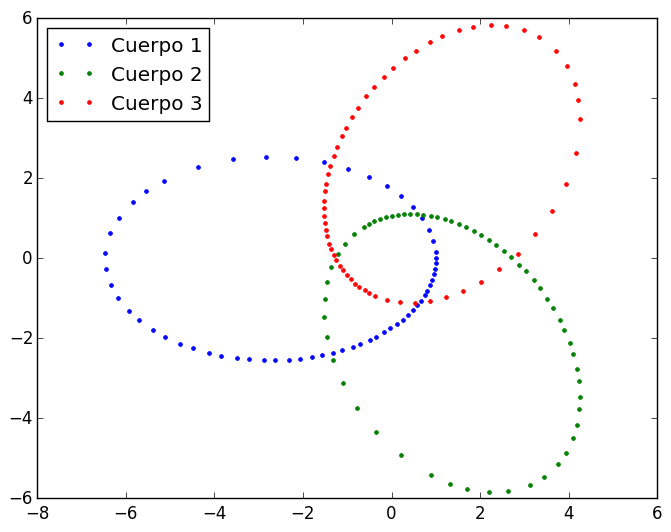

In [13]:
plot(x_1,y_1, marker = ".", linestyle ="", label ="Cuerpo 1")
plot(x_2,y_2, marker = ".", linestyle ="", label ="Cuerpo 2")
plot(x_3,y_3, marker = ".", linestyle ="", label ="Cuerpo 3")
legend(loc="auto")
show()

In [14]:
ts2, c12, c22, c32 = Integrador_1(prueba2_pos, prueba2_vel, prueba2_masas, 0., 1., 28)
pos_1b = c12[1]
x_1b = [j[1] for j in pos_1b]
y_1b = [j[2] for j in pos_1b]
pos_2b = c22[1]
x_2b = [j[1] for j in pos_2b]
y_2b = [j[2] for j in pos_2b]
pos_3b = c32[1]
x_3b = [j[1] for j in pos_3b]
y_3b = [j[2] for j in pos_3b];

In [15]:
length(ts2)

84

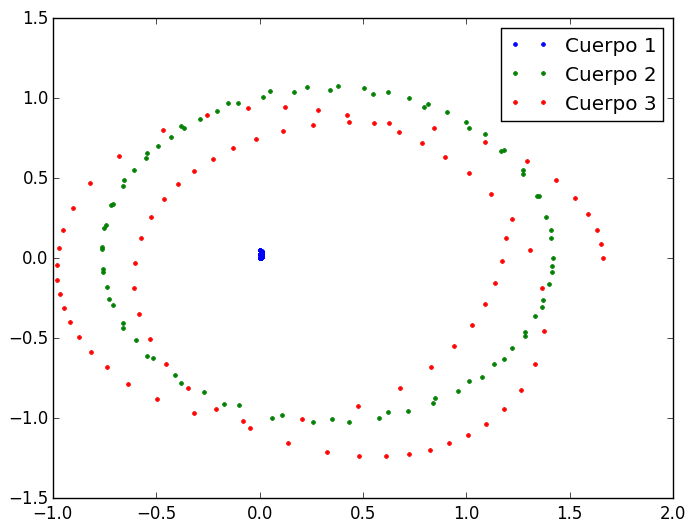

In [16]:
plot(x_1b,y_1b, marker = ".", linestyle ="", label ="Cuerpo 1")
plot(x_2b,y_2b, marker = ".", linestyle ="", label ="Cuerpo 2")
plot(x_3b,y_3b, marker = ".", linestyle ="", label ="Cuerpo 3")
legend(loc="auto")
show()